Mariel Vicente

D213: Advanced Data Analytics

<center> 

## Performance Assessment: Task 1

</center>


### Part I: Research Question
My research question for this performance assessment is, "Can revenue be accurately forecasted by training an ARIMA model on two years of available revenue data?" One goal of this analysis is to explore whether there are seasonal trends that appear in the revenue data. Another goal is to create a forecast of future revenue using an ARIMA model trained on the available data.

### Part II: Method Justification
One assumption of a time series model is that the data is stationary. This means that the mean, variance and autocorrelation are all constant over time. Autocorrelation measures the relationship between current and past elements in the time series. A second assumption is there is no autocorrelation in the residuals of the data. Another assumption is that the time series data is linear over time. A fourth assumption is that the residuals are normally distributed.

### Part III: Data Preparation

First, I installed the necessary packages to complete my exploratory data analysis and build my ARIMA model.

In [1]:
#Import necessary packages
import pandas as pd #DataFrame, data manipulation
from pandas import DataFrame
import numpy as np #array & numerical manipulation

#Data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime #convert to date format
from statsmodels.tsa.stattools import adfuller #test stationarity
from sklearn.model_selection import train_test_split #split train/set sets

from pmdarima import auto_arima #p,d,q values & seasonality
from statsmodels.tsa.arima.model import ARIMA #build ARIMA model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #plot ACF & PACF
from statsmodels.tsa.seasonal import seasonal_decompose #plot decomposition

from sklearn.metrics import mean_squared_error #calculate MSE/RMSE
from math import sqrt

import warnings #ignore warnings
warnings.filterwarnings('ignore')

Next, I loaded the data and obtained an overview of the data.

In [2]:
#Load the data, explore the data
df = pd.read_csv('C:/Users/12034/OneDrive/Documents/WGU/D213_medical_time_series.csv')
df.shape

(731, 2)

In [3]:
df.head()

,Day,Revenue
0,1,0.000000
1,2,-0.292356
2,3,-0.327772
3,4,-0.339987
4,5,-0.124888


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Day      731 non-null    int64  
 1   Revenue  731 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.6 KB


In [5]:
df.describe()

,Day,Revenue
count,731.000000,731.000000
mean,366.000000,14.179608
std,211.165812,6.959905
min,1.000000,-4.423299
25%,183.500000,11.121742
50%,366.000000,15.951830
75%,548.500000,19.293506
max,731.000000,24.792249


In order to format the time steps of the realization, I converted the 'Day' column to a date structure beginning on January 1, 2022. I set the new 'Date' variable as the index and dropped the 'Day' variable. I confirmed the length of the sequence using the shape function. I then assessed the data set for nulls and duplicates to confirm there were no gaps in the measurement. The conversion resulted in two full years of data with no missing days.

In [6]:
#Convert Day to date structure
df['Date'] = (pd.date_range(start=datetime(2022, 1, 1),
                           periods=df.shape[0], freq='24H'))

#Set date as index
df.set_index(['Date'], inplace=True)
df

,Day,Revenue
Date,,
2022-01-01,1,0.000000
2022-01-02,2,-0.292356
2022-01-03,3,-0.327772
2022-01-04,4,-0.339987
2022-01-05,5,-0.124888
...,...,...
2023-12-28,727,15.722056
2023-12-29,728,15.865822
2023-12-30,729,15.708988


In [7]:
#Drop Day column
df = df.drop(columns=['Day'])
df.shape

(731, 1)

In [8]:
#Assess for nulls
df.isnull().any()

Revenue    False
dtype: bool

In [9]:
#Assess for duplicates
df.duplicated().value_counts()

False    731
Name: count, dtype: int64

Below I visualized the realization of the time series with a line graph. Then I exported the cleaned data set to a csv file.

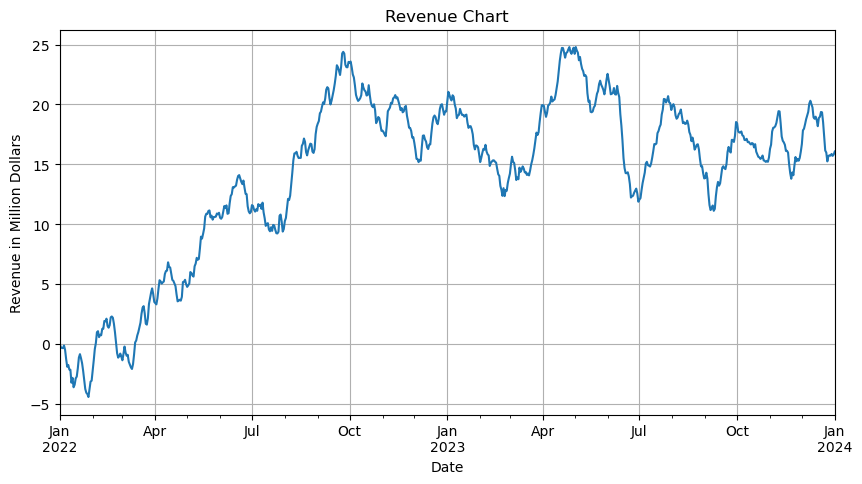

In [10]:
#Visualize time series
df['Revenue'].plot(figsize=(10,5))
plt.title('Revenue Chart')
plt.xlabel('Date')
plt.ylabel('Revenue in Million Dollars')
plt.grid(True)
plt.show()

In [11]:
#Export output to csv file
df.to_csv('C:/Users/12034/OneDrive/Documents/WGU/D213_T1_MV_med_clean.csv')

Next, I evaluated the stationarity of the time series using the Augmented Dickey-Fuller test. The results showed that the data was not stationary. To make the data stationary, I differenced the data. I tested the new differenced data frame using the Augmented Dickey-Fuller test again. The results showed that the differenced data was stationary with a p-value <= 0.05.

In [12]:
#Test stationarity using adfuller
result = adfuller(df['Revenue'])
print("Test statistics: ", result[0])
print("p-value: ", result[1])
print("critical values: ", result[4])

if result[1]<= 0.05:
    print("Reject null hypothesis, the time series is stationary")
else:
    print("Fail to reject null hypothesis, the time series is not stationary")

Test statistics:  -2.2183190476089436
p-value:  0.199664006150644
critical values:  {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}
Fail to reject null hypothesis, the time series is not stationary


In [13]:
#The data is not stationary, make the times series stationary using diff()
df_stationary = df.diff().dropna()
df_stationary.head()

,Revenue
Date,
2022-01-02,-0.292356
2022-01-03,-0.035416
2022-01-04,-0.012215
2022-01-05,0.215100
2022-01-06,-0.366702


In [14]:
#Export differenced data to csv file
df_stationary.to_csv('C:/Users/12034/OneDrive/Documents/WGU/D213_T1_MV_med_diff.csv')

In [15]:
#Test for stationarity again
result = adfuller(df_stationary['Revenue'])
print("Test statistics: ", result[0])
print("p-value: ", result[1])
print("critical values: ", result[4])

if result[1]<= 0.05:
    print("Reject null hypothesis, the time series is stationary")
else:
    print("Fail to reject null hypothesis, the time series is not stationary")

Test statistics:  -17.374772303557066
p-value:  5.113206978840171e-30
critical values:  {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}
Reject null hypothesis, the time series is stationary


I split the original data set into training and testing sets using an 80/20 split. I confirmed the split by comparing the shape of each set to the original data set. Then I exported the training and testing sets to csv files.

In [16]:
#Split the data into training and testing sets
train, test = train_test_split(df, test_size=0.20, random_state=42, shuffle=False)
print(df.shape)
print(train.shape, test.shape)

(731, 1)
(584, 1) (147, 1)


In [17]:
#Export training and testing sets to csv
train.to_csv('C:/Users/12034/OneDrive/Documents/WGU/D213_T1_MV_train.csv')
test.to_csv('C:/Users/12034/OneDrive/Documents/WGU/D213_T1_MV_test.csv')

### Part IV: Model Identification and Analysis

To analyze the time series data set, I first assessed for the presence or lack of a seasonal component by plotting a subset of the stationary data. The graph below demonstrates noisy data without the presence of seasonality.

<Axes: xlabel='Date'>

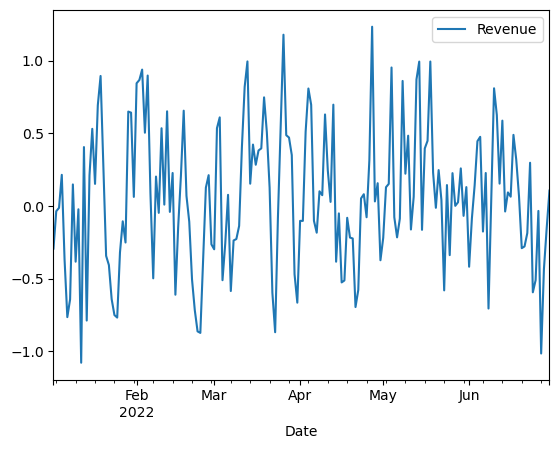

In [18]:
#1. The presence or lack of a seasonal component
#Check for seasonality in subset of stationary data
df_stationary.loc[:'2022-06-30'].plot()

Next, I assessed the autocorrelation of the original data set. The line extends outside of the confidence intervals (dotted lines) which indicates autocorrelation in the data. The ACF & PACF plot values also extend outside of the confidence intervals (shaded blue area) which indicates autocorrelation exists.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

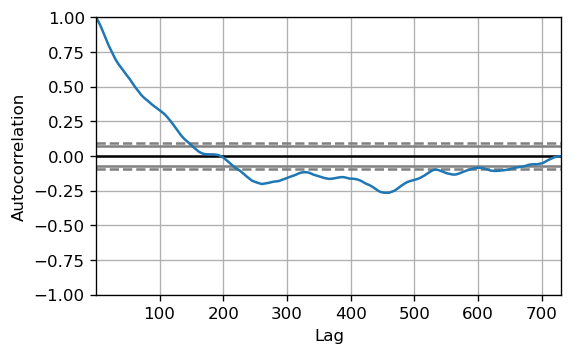

In [19]:
#2. The autocorrelation function
#Autocorrelation of original data
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':120})
pd.plotting.autocorrelation_plot(df.Revenue.tolist())

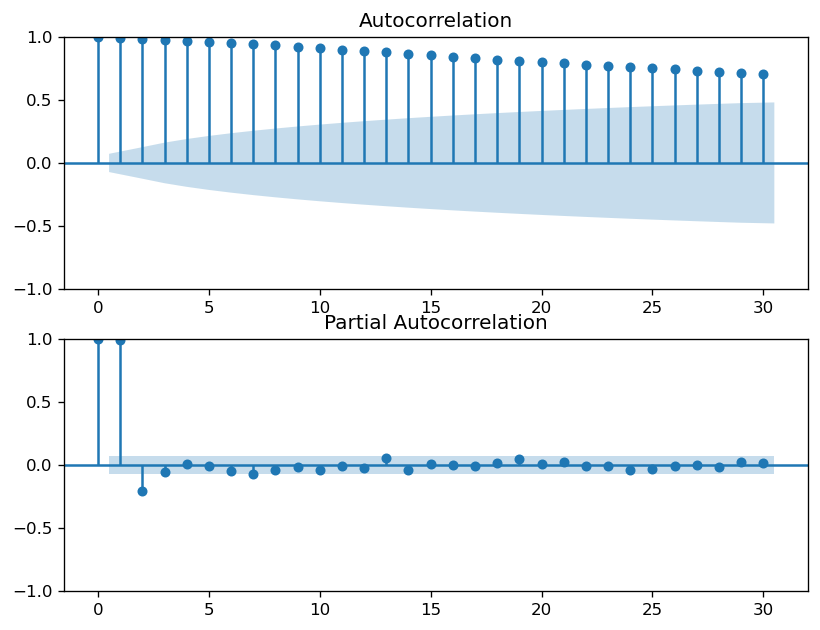

In [20]:
#Plot the ACF of original data
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
fig = plot_acf(df.Revenue, lags=30, ax=ax1)

#gPlot the PACF of original data
ax2 = fig.add_subplot(212)
fig = plot_pacf(df.Revenue, lags=30, ax=ax2)
plt.show()

After assessing the original data, I visualized the ACF & PACF of the stationary data. Most of the data falls within the confidence intervals with some extending outside, which indicates there is some autocorrelation in the data.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

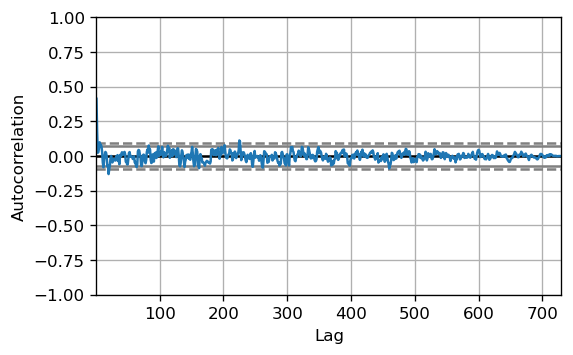

In [21]:
#Autocorrelation of differenced data
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':120})
pd.plotting.autocorrelation_plot(df_stationary.Revenue.tolist())

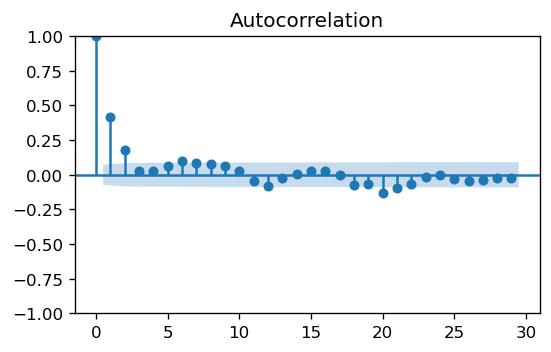

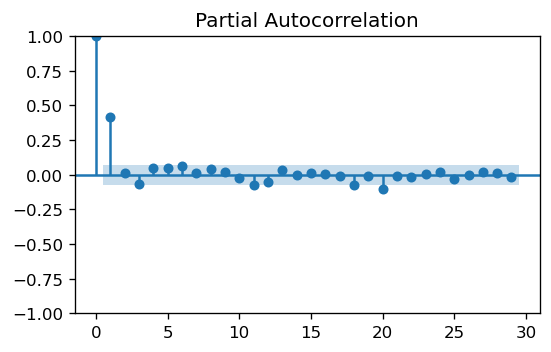

In [22]:
#Plot ACF & PACF of differenced data
plot_acf(df_stationary)
plot_pacf(df_stationary)
plt.show()

Next, I visualized the spectral density of the stationary data. The resulting graph did not demonstrate any seasonality in the data.

(array([0.32257506, 0.40884703, 0.49108501, 0.59363947, 0.44995182,
        0.43635387, 0.5357234 , 0.16305364, 0.34293175, 0.41847817,
        0.1854376 , 0.38567299, 0.39874179, 0.1799679 , 0.17853729,
        0.28365529, 0.1610269 , 0.10640454, 0.53767765, 0.46046065,
        0.11950937, 0.19963337, 0.36416991, 0.26380782, 0.1623704 ,
        0.15866557, 0.08052751, 0.40736853, 0.22936871, 0.22299038,
        0.8777625 , 0.48053998, 0.42173172, 0.38112086, 0.98119354,
        0.35808748, 0.15519901, 0.39425909, 0.36036735, 0.25216393,
        0.2264646 , 0.08593259, 0.15464965, 0.19248573, 0.22499538,
        0.67046396, 0.55864956, 0.255673  , 0.1297722 , 0.18896368,
        0.27492621, 0.17285359, 0.24883683, 0.20734247, 0.14470371,
        0.1810512 , 0.01763434, 0.11846138, 0.14886074, 0.03217488,
        0.08328853, 0.15081611, 0.16255357, 0.1569423 , 0.19494704,
        0.15886441, 0.09868138, 0.04977481, 0.07095888, 0.09345138,
        0.08781674, 0.03171429, 0.06113389, 0.14

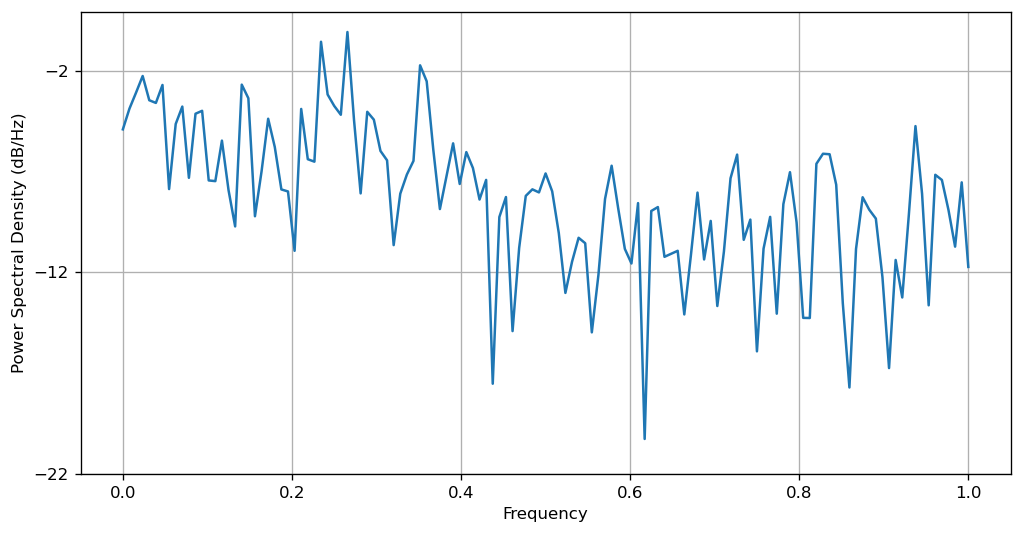

In [23]:
#3. Visualize spectral density using stationary data
plt.figure(figsize=(10,5), linewidth=3)
plt.psd(df_stationary['Revenue'])

I decomposed the original data with the period parameter set to 90 days. The graphs below show the trends, seasonality, and residuals plotted after decomposition. There is some seasonality shown. The trend graph shows an upward trend over time. There are no observable trends seen in the residuals of the decomposed series. 

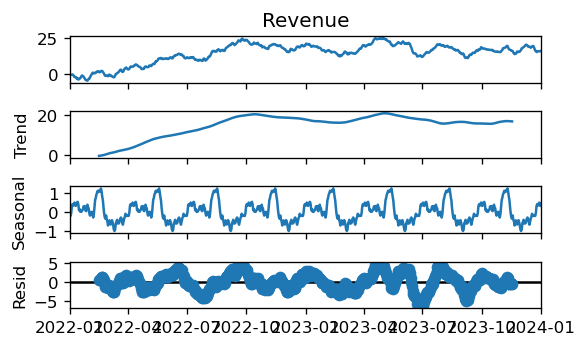

In [24]:
#4. The decomposed time series
#Plot decomposition using stationary data
decomp = seasonal_decompose(df['Revenue'], period=90) #90-day cyclicality
decomp.plot()
plt.show()

<Axes: title={'center': 'Seasonality'}, xlabel='Date'>

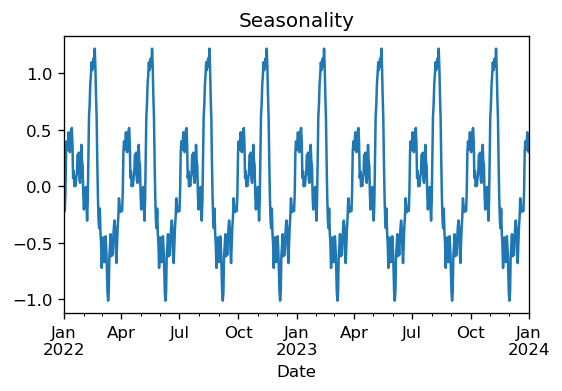

In [25]:
#Plot seasonality of stationary data whose value is in the variable decomp
plt.title('Seasonality')
decomp.seasonal.plot()

<Axes: title={'center': 'Trend'}, xlabel='Date'>

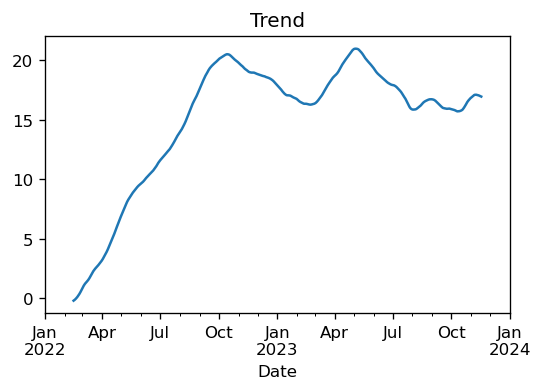

In [26]:
#5. Trends
#View the trends of stationary data whose value is in the variable decomp
plt.title('Trend')
decomp.trend.plot()

<Axes: title={'center': 'Residuals'}, xlabel='Date'>

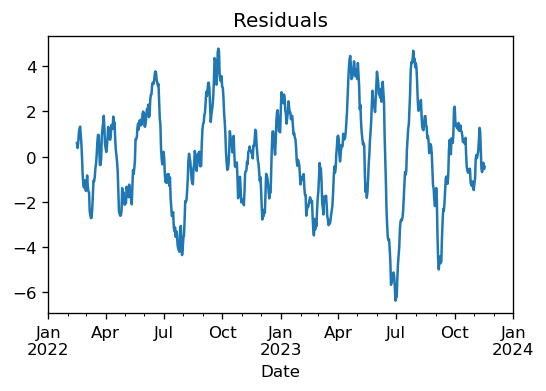

In [27]:
#6. Confirmation of the lack of trends in the residuals of decomp series
#Plot the residuals of the stationary data whose value is in the variable decomp
plt.title('Residuals')
decomp.resid.plot()

Next, I identified the best ARIMA model that accounted for the observed trend and seasonality of the times series data by utilizing the auto_arima function to perform a stepwise search. The results showed that the best p, d, & q values for an ARIMA model were 1, 1, & 0 with no seasonality (0,0,0) and no periodicity (0). The AIC for my best model was 879.982. I tested the model twice more with different parameters to ensure that the AIC of the best model was the lowest, which it was.

In [28]:
#Run auto_arima on original data
stepwise_fit = auto_arima(df['Revenue'], trace=True, suppresswarnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=883.277, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1015.972, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=881.359, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=906.199, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1015.481, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=883.300, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=883.314, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=883.348, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=879.982, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=881.911, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=881.927, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=905.166, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=881.947, Time=0.18 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.711 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  731
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -437.991
Date:                Sun, 22 Dec 2024   AIC                            879.982
Time:                        17:18:44   BIC                            889.168
Sample:                    01-01-2022   HQIC                           883.526
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4142      0.034     12.258      0.000       0.348       0.480
sigma2         0.1943      0.011     17.842      0.000       0.173       0.216
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.92
Prob(Q):                              0.90   Prob(JB):                         0.38
Heteroskedasticity (H):               1.00   Skew:                            -0.02
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
#Best model:  ARIMA(1,1,0)(0,0,0)[0], no seasonality (0,0,0) & no periodicity [0]
#Build and fit best model according to auto_arima on training set
model = ARIMA(train['Revenue'],order=(1,1,0))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  584
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -350.812
Date:                Sun, 22 Dec 2024   AIC                            705.625
Time:                        17:18:44   BIC                            714.361
Sample:                    01-01-2022   HQIC                           709.030
                         - 08-07-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4106      0.038     10.837      0.000       0.336       0.485
sigma2         0.1950      0.012     15.888      0.000       0.171       0.219
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 1.86
Prob(Q):                              0.70   Prob(JB):                         0.39
Heteroskedasticity (H):               1.04   Skew:                            -0.05
Prob(H) (two-sided):                  0.78   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
#Test a second model
model2 = ARIMA(train['Revenue'],order=(1,0,0))
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  584
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -408.119
Date:                Sun, 22 Dec 2024   AIC                            822.238
Time:                        17:18:44   BIC                            835.348
Sample:                    01-01-2022   HQIC                           827.348
                         - 08-07-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7911      6.683      1.615      0.106      -2.308      23.890
ar.L1          0.9985      0.002    431.605      0.000       0.994       1.003
sigma2         0.2345      0.014     16.295      0.000       0.206       0.263
===================================================================================
Ljung-Box (L1) (Q):                  97.61   Jarque-Bera (JB):                 0.74
Prob(Q):                              0.00   Prob(JB):                         0.69
Heteroskedasticity (H):               1.06   Skew:                            -0.01
Prob(H) (two-sided):                  0.67   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
#AIC not lower, test a third model
model3 = ARIMA(train['Revenue'],order=(1,0,5))
model3 = model3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  584
Model:                 ARIMA(1, 0, 5)   Log Likelihood                -350.345
Date:                Sun, 22 Dec 2024   AIC                            716.690
Time:                        17:18:45   BIC                            751.650
Sample:                    01-01-2022   HQIC                           730.316
                         - 08-07-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7148      5.200      2.253      0.024       1.523      21.907
ar.L1          0.9965      0.004    284.707      0.000       0.990       1.003
ma.L1          0.4077      0.042      9.799      0.000       0.326       0.489
ma.L2          0.2424      0.046      5.233      0.000       0.152       0.333
ma.L3          0.0279      0.047      0.591      0.554      -0.065       0.120
ma.L4         -0.0217      0.047     -0.458      0.647      -0.115       0.071
ma.L5         -0.0357      0.043     -0.831      0.406      -0.120       0.048
sigma2         0.1923      0.012     15.602      0.000       0.168       0.216
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.25
Prob(Q):                              0.90   Prob(JB):                         0.33
Heteroskedasticity (H):               1.04   Skew:                            -0.05
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Once I determined and fit the best model on the training set, I performed a forecast using the training model. I calculated the confidence intervals for the forecast. Then, I plotted a graph of the training forecast compared to the test set.

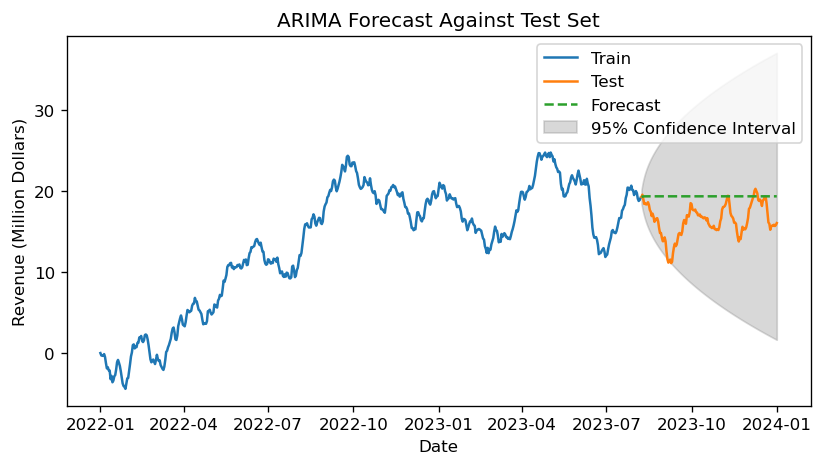

In [32]:
#AIC still not lower, can keep initial model
#Calculate forecasts for the next 147 days (length of test set)
n_forecast_periods = 147
forecast = model.forecast(steps=n_forecast_periods)

#Get confidence intervals for the forecasts
forecast_ci = model.get_forecast(steps=n_forecast_periods).conf_int()


#Plot the training set, test set, and forecast with confidence intervals
plt.figure(figsize=(8, 4))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forecast.index, forecast, label="Forecast", linestyle='--')
plt.fill_between(forecast.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.3, label="95% Confidence Interval")
plt.title("ARIMA Forecast Against Test Set")
plt.xlabel("Date")
plt.ylabel("Revenue (Million Dollars)")
plt.legend()
plt.show()

In [33]:
#Calculate lower and upper CI
print(min(forecast_ci.iloc[:, 0]))
print(max(forecast_ci.iloc[:, 1]))

1.6461918159730047
37.11035267332909


To evaluate the model forecast, I calculated the MSE & RSME.

In [34]:
#Calculate MSE
mse = mean_squared_error(forecast,test)
print(mse)

12.679409737324526


In [35]:
#Calculate RMSE
rmse = sqrt(mse)
print(rmse)

3.5608158808515395


### Part V: Data Summary and Implications

To select the best ARIMA model, I utilized the auto_arima function, which uses a stepwise approach to test different models until the best model is determined. The prediction interval of the forecast is one day. The forecast length was set to 147 days to match the full length of the test set. This was done to confirm that all test set values fell within the confidence interval range. The lower and upper 95% confidence interval range falls between 1.7 and 37.1 million dollars. The model was evaluated by comparing test models and selecting the model with the lowest AIC value. The error metrics used to evaluate the model were mean squared error (MSE) and root mean squared error (RMSE), which were calculated to be 12.7 and 3.6, respectively. Since the model is looking at revenue in millions of dollars, we can conclude that the error rates are low.

Based on the results of my analysis, the test set fell within the confidence intervals. Therefore, I conclude that the model was able to accurately forecast future revenue. The recommended course of action is to follow up this analysis with an ARIMA model using a larger data set with a greater length of time. Two years of data was able to create a forecast of 237 days, but to look farther ahead, more data over time will be necessary.

### Part VI: Reporting

#### Sources for Third Party Code
Elleh, Festus. D213 Task 1 Cohort Webinar PPT. Retrieved December 17, 2024.

Sewell, William. D213 Webinar I- Task One ARIMA. Retrieved December 17, 2024.


#### Sources
Elleh, Festus. D213 Task 1 Cohort Webinar PPT. Retrieved December 17, 2024.

Sewell, William. D213 Webinar I- Task One ARIMA. Retrieved December 17, 2024.